In [1]:
from src.data_processor import ecommerceProcessor
from src.visualization_engine import ecommerceViz
from src.segmentation import customerSegmentation

In [2]:
processor = ecommerceProcessor()
processor.run_queries(test_=True)
processor.prep_events()
processor.prep_session()
processor.prep_agg_conversion()

/Users/samueljoseph/Documents/Programming/ecommerce-funnel-analysis/.venv/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(
INFO:src.data_loader:Successfully ran event query
INFO:src.data_loader:Successfully ran session query
INFO:src.data_loader:Successfully ran device query
INFO:src.data_loader:Successfully ran geo query
INFO:src.data_processor:Converted events from wide to long
INFO:src.data_processor:Converted session from wide to long
INFO:src.data_processor:Converted events from wide to long
INFO:src.data_processor:Aggregated events


# Overview

This report shows the key dimensions of customer conversion on the company's ecommerce website.

Only four steps were analyzed in the customer journey: Page View, Added to Cart, Began Checkout and Purchased.

## Sections

1. Overall Conversion Rates Across Key Events
2. Conversion Rates Over Time
3. Trends in Aggregate Conversion Events
4. Customer Segments and Segment Conversion

## Summary of Key Findings

# 1. Conversion Rates Across Key Events

Key Observations:
- A really small fraction (~5%) of customers convert from viewing the page to adding items to cart
- The most dramatic drop in conversion happens from beginning checkout to completing a purchase (over 50% reduction in the conversion rate). This is extremely high, and I suggest examining the checkout process. Possible causes:
    - There may be too many steps in the process and customers get frustrated and give up
    - There may be a bug with required information, etc. that make users second guess the purchase
    - There could be nothing wrong with the interface, but unexpected charges are being applied (i.e. shipping, cannot use code, cannot apply a sale) that is turning customers away

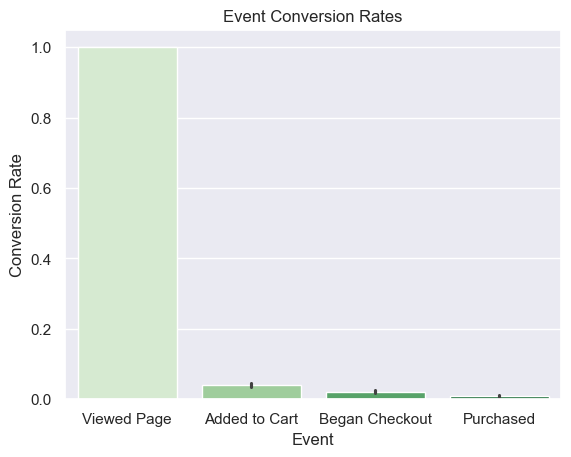

In [3]:
visualizer = ecommerceViz(processor)
visualizer.plot_conversion_rate()

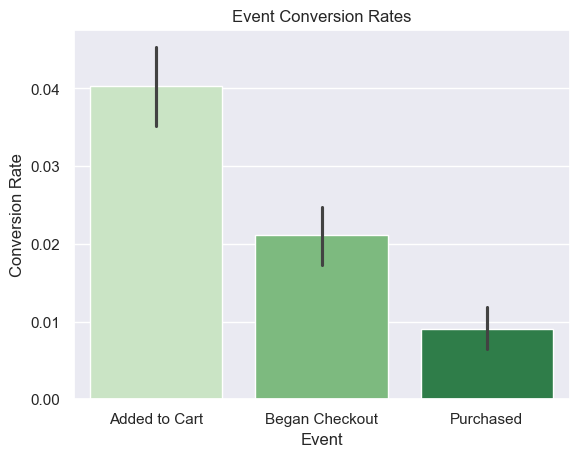

In [4]:
visualizer.plot_conversion_rate(remove_pageview=True)

# 2. Conversion Rates over Time

Observations:
- Traffic was growing throughout November and December, likely ahead of the Christmas holiday in the US and other countries
- A large spike came mid-December. Was there a sales campaign at that time? 
    - While total purchaes seemed to increase, it appears there was a drop in conversion rates
    - It's possible these new visitors were net-new to the site, but may have struggled with navigation or the checkout process (or were only enticed by the sales offerings, not necessarily interest in the products)
    - This warrants further exploration with the sales and marketing team along with product
- There is very clear weekly seasonality, with Sundays appearing to be the strongest sales day

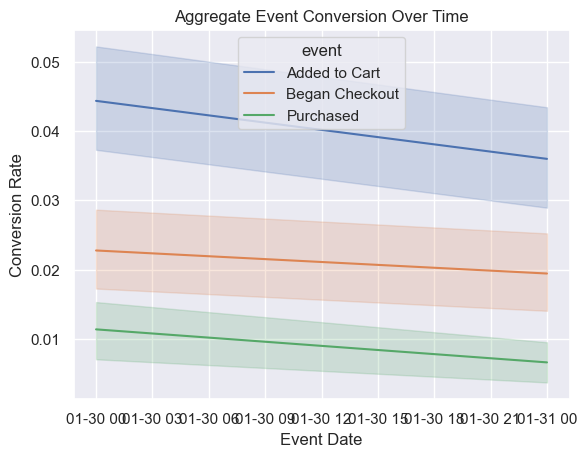

In [5]:
visualizer.plot_conversion_rates_over_time(remove_pageview=True)

# 3. Trends in Aggregate Events

There is an anomaly in the first few weeks of the collection period where there are fewer adds to cart than purchases. This is impossible and needs to be investigated.

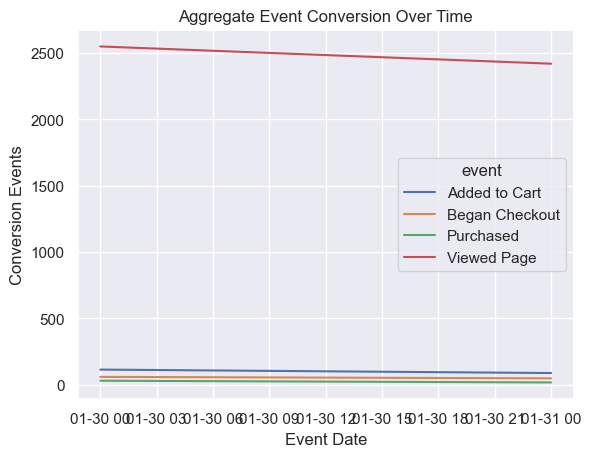

In [6]:
visualizer.plot_conversion_events_over_time()

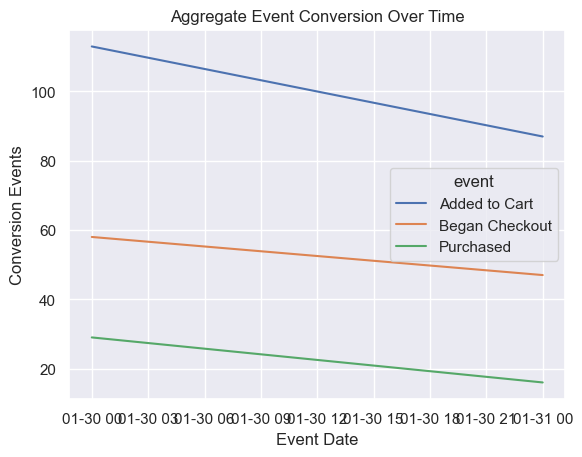

In [7]:
visualizer.plot_conversion_events_over_time(remove_pageview=True)

# Customer Segments and Segment Conversion

In [4]:
segmenter = customerSegmentation(processor)

segmenter.prep_segment_data()
segmenter.prep_clustering_data(cols=['user_pseudo_id',
                                         'continent',
                                         'country',
                                         'category'])
segmenter.create_kmeans()
segmenter.add_customer_segments()
segmenter.describe_segments()

INFO:src.segmentation:Successfully prepped customer dataframe
INFO:src.segmentation:Successfully prepped segmentation data
INFO:src.segmentation:Added segments to long events table


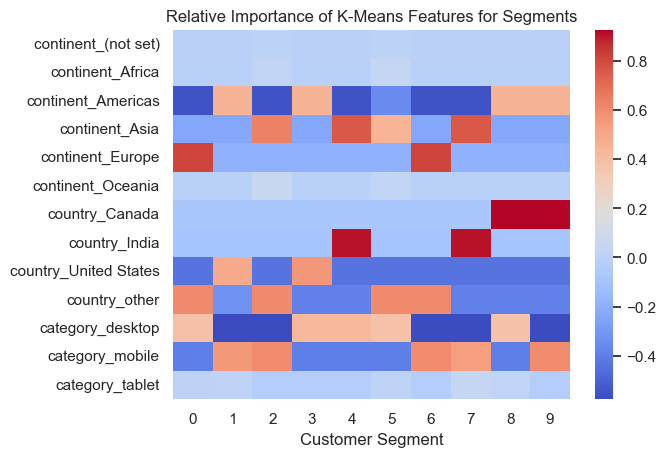

In [5]:
visualizer.plot_segment_heatmap(segmenter.heatmap_df)

## Description of identified customer segments from K-Means clustering

Ten customer segments were identified using k-means. Customer segments are mostly differentiated by location and device type.

- Segment 0: US-based mobile customers
- Segment 1: European desktop customers
- Segment 2: US Desktop customers
- Segment 3: Asia-based (exlcuding India) mobile customers
- Segment 4: Desktop-based customers in India
- Segment 5: Asia-based (exclusing India) desktop customers
- Segment 6: Mobile customers in India
- Segment 7: Mobile users in Europe
- Segment 8: Desktop users in Canada
- Segment 9: Mobible users in Canada

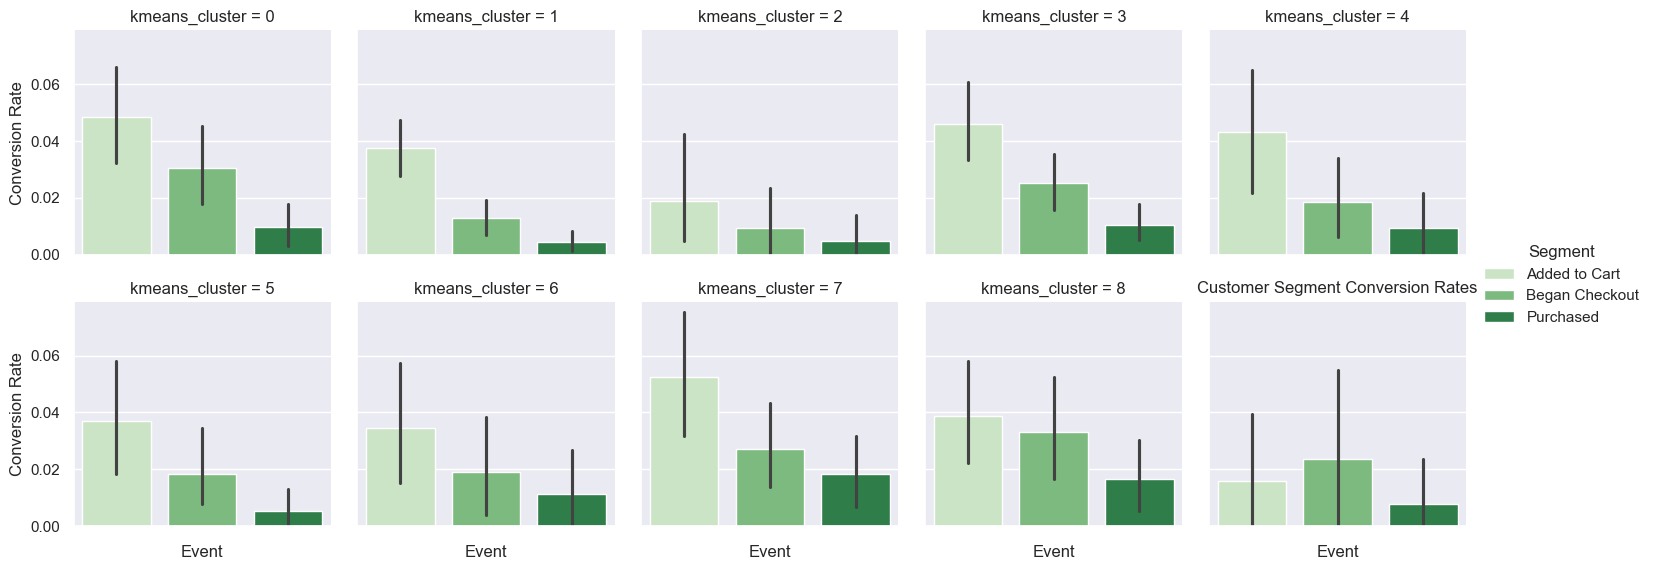

In [5]:
visualizer.plot_conversion_rate(plot_segments=True,
                                remove_pageview=True,
                                col_wrap=5)

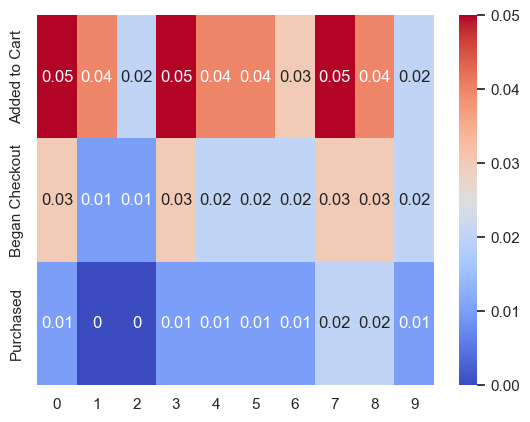

In [7]:
processor.prep_segments_conversion_heatmap()
visualizer.create_segment_conversion_heatmap(remove_pageview=True)

## Key Observations of Customer Segment Conversion Rates

- Overall purchase rate conversion is similar across all customer segments, hoving around 4%
- Mobile users in Canada (segment 9) have good conversion from adding items to cart to beginning checkout, but fall off when going to purchase
- Mobile users in Europe (segment 7) have the strongest add to cart to purchase conversion.